In [6]:
import numpy as np
import pandas as pd

# PCA 알고리즘 구현해보기

## 고유 벡터, 고유값 정리, 및 공분산 행렬 활용

### 출처 : https://github.com/minsuk-heo/python_tutorial/blob/master/data_science/pca/PCA.ipynb

# 1. 데이터 준비

In [9]:
df = pd.DataFrame(columns=['calory', 'breakfast', 'lunch', 'dinner', 'exercise', 'body_shape'])

df.loc[0] = [1200, 1, 0, 0, 2, 'Skinny']
df.loc[1] = [2800, 1, 1, 1, 1, 'Normal']
df.loc[2] = [3500, 2, 2, 1, 0, 'Fat']
df.loc[3] = [1400, 0, 1, 0, 3, 'Skinny']
df.loc[4] = [5000, 2, 2, 2, 0, 'Fat']
df.loc[5] = [1300, 0, 0, 1, 2, 'Skinny']
df.loc[6] = [3000, 1, 0, 1, 1, 'Normal']
df.loc[7] = [4000, 2, 2, 2, 0, 'Fat']
df.loc[8] = [2600, 0, 2, 0, 0, 'Normal']
df.loc[9] = [3000, 1, 2, 1, 1, 'Fat']

df.head(10)

,calory,breakfast,lunch,dinner,exercise,body_shape
0,1200,1,0,0,2,Skinny
1,2800,1,1,1,1,Normal
2,3500,2,2,1,0,Fat
3,1400,0,1,0,3,Skinny
4,5000,2,2,2,0,Fat
5,1300,0,0,1,2,Skinny
6,3000,1,0,1,1,Normal
7,4000,2,2,2,0,Fat
8,2600,0,2,0,0,Normal
9,3000,1,2,1,1,Fat


In [12]:
x = df[['calory', 'breakfast', 'lunch', 'dinner', 'exercise']]
y = df[['body_shape']]

# 2. 데이터 정규화 해주기

### 평균 0, 분산 1로 정규화

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
x_std = StandardScaler().fit_transform(x)
x_std

array([[-1.35205803,  0.        , -1.3764944 , -1.28571429,  1.        ],
       [ 0.01711466,  0.        , -0.22941573,  0.14285714,  0.        ],
       [ 0.61612771,  1.29099445,  0.91766294,  0.14285714, -1.        ],
       [-1.18091145, -1.29099445, -0.22941573, -1.28571429,  2.        ],
       [ 1.89972711,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-1.26648474, -1.29099445, -1.3764944 ,  0.14285714,  1.        ],
       [ 0.18826125,  0.        , -1.3764944 ,  0.14285714,  0.        ],
       [ 1.04399418,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-0.15403193, -1.29099445,  0.91766294, -1.28571429, -1.        ],
       [ 0.18826125,  0.        ,  0.91766294,  0.14285714,  0.        ]])

# 3. 공분산 행렬 만들기

## 공분산 행렬 : 행렬 A 와 전치 행렬 A 를 곱한다

## 의미 : 어느 방향으로 데이터가 뻗어있는지 대략적으로 알 수 있다

In [24]:
features = x_std.T
covariance_matrix = np.cov(features)
covariance_matrix

array([[ 1.11111111,  0.88379717,  0.76782385,  0.89376551, -0.93179808],
       [ 0.88379717,  1.11111111,  0.49362406,  0.81967902, -0.71721914],
       [ 0.76782385,  0.49362406,  1.11111111,  0.40056715, -0.76471911],
       [ 0.89376551,  0.81967902,  0.40056715,  1.11111111, -0.63492063],
       [-0.93179808, -0.71721914, -0.76471911, -0.63492063,  1.11111111]])

# 4. 공분산 행렬로부터 고유값, 고유값 벡터 추출하기

## Ax = λx 일 때 벡터 x를 고유값 벡터, λ를 고유값.(λ는 상수) 

In [34]:
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)
print(f'아이겐 벡터 :{eig_vecs}')
print()
print(f'아이겐 값 : {eig_vals}')

아이겐 벡터 :[[-0.508005   -0.0169937  -0.84711404  0.11637853  0.10244985]
 [-0.44660335 -0.36890361  0.12808055 -0.63112016 -0.49973822]
 [-0.38377913  0.70804084  0.20681005 -0.40305226  0.38232213]
 [-0.42845209 -0.53194699  0.3694462   0.22228235  0.58954327]
 [ 0.46002038 -0.2816592  -0.29450345 -0.61341895  0.49601841]]

아이겐 값 : [4.0657343  0.8387565  0.07629538 0.27758568 0.2971837 ]


### 1차원으로 줄인다면 73%의 분산 가지고 있다

In [35]:
eig_vals[0] / sum(eig_vals)

0.7318321731427545

# 5. 데이터를 아이겐 벡터에 정사영시킨다

In [37]:
projected_x = x_std.dot(eig_vecs.T[0])
projected_x

array([ 2.22600943,  0.0181432 , -1.76296611,  2.73542407, -3.02711544,
        2.14702579,  0.37142473, -2.59239883,  0.39347815, -0.50902498])

In [40]:
result = pd.DataFrame(projected_x, columns = ['PC1'])
result['y-axis'] = 0
result['label'] = y

result.head(10)

,PC1,y-axis,label
0,2.226009,0,Skinny
1,0.018143,0,Normal
2,-1.762966,0,Fat
3,2.735424,0,Skinny
4,-3.027115,0,Fat
5,2.147026,0,Skinny
6,0.371425,0,Normal
7,-2.592399,0,Fat
8,0.393478,0,Normal
9,-0.509025,0,Fat


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\choij\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'PCA result')

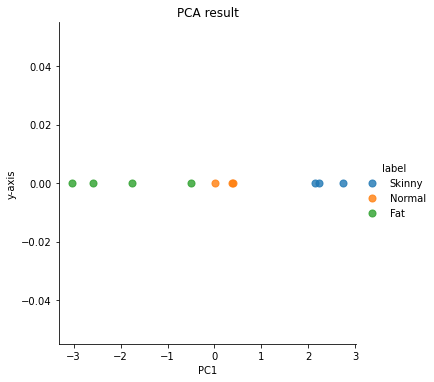

In [42]:
sns.lmplot('PC1', 'y-axis', data = result, fit_reg = False, scatter_kws = {'s':50}, hue = 'label')
plt.title('PCA result')

## 요약 : 각 데이터들을 정규화 시킨 후 공분산 행렬을 찾은 다음 행렬에 대한 고유값과 고유값 벡터를 찾고 데이터들을 이 고유값 벡터에 정사영시킨다.

## 이러한 최종목적은 차원 축소에 있으며 더 나아가서 데이터를 압축시킨다.